# IHLT Lab 8: Named Entities

**Author:** *Zachary Parent ([zachary.parent](mailto:zachary.parent@estudiantat.upc.edu))*

### 2024-11-14

**Instructions:**

* Consider the following sentence:
    > Lazy cats play with mice.
* Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.

* Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.
* For each one of them, provide the resulting tree, the number of edges and the list of explored edges.
* Which parser is the most efficient for parsing the sentence?
* Which edges are filtered out by each parser and why?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import CFG, ChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser
import svgling

<class 'nltk.parse.chart.ChartParser'>


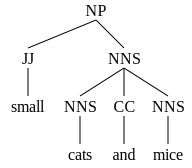

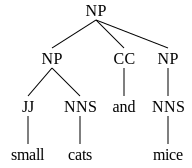

,parser,num_trees,num_edges,edges
0,ChartParser,2,28,"[[0:1] 'small', [1:2] 'cats', [2:3] 'and', [3:..."


In [2]:
grammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small"
  CC  -> "and" | "or"
  ''')

sent = "small cats and mice"

parsers = [ChartParser]
chart_stats = []

for parser_class in parsers:
    print(parser_class)
    parser = parser_class(grammar)
    chart = parser.chart_parse(sent.split())
    trees = list(chart.parses(grammar.start()))
    for tree in trees:
        display(svgling.draw_tree(tree))
    chart_stats.append({
        "parser": parser_class.__name__,
        "num_trees": len(trees),
        "num_edges": chart.num_edges(),
        "edges": chart.edges()
    })

chart_stats = pd.DataFrame(chart_stats)
chart_stats


BottomUpChartParser


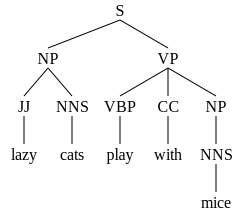

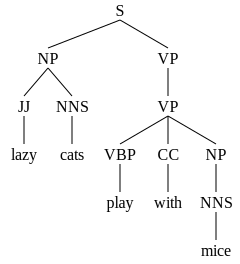

BottomUpLeftCornerChartParser


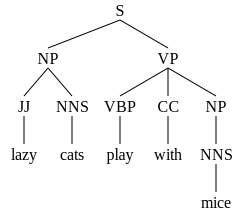

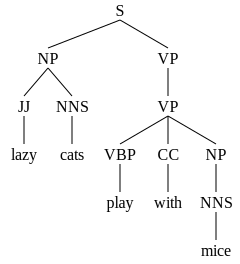

LeftCornerChartParser


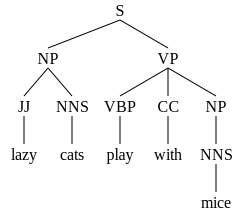

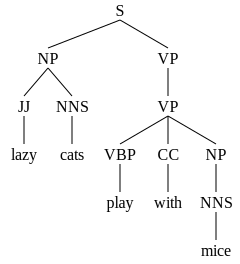

,parser,num_trees,num_edges
0,BottomUpChartParser,2,48
1,BottomUpLeftCornerChartParser,2,29
2,LeftCornerChartParser,2,22


In [3]:
grammar = CFG.fromstring('''
  S  -> NP VP
  NP  -> NNS | JJ NNS | NP CC NP
  VP  -> VBP NP | VBP CC NP | VP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small" | "lazy"
  CC  -> "and" | "or" | "with"
  VBP -> "play"
  ''')

sent = "Lazy cats play with mice.".lower().strip(".")

parsers = [BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser]
chart_stats = []

for parser_class in parsers:
    print(parser_class.__name__)
    parser = parser_class(grammar)
    chart = parser.chart_parse(sent.split())  # Use chart_parse instead of parse
    trees = list(chart.parses(grammar.start()))
    for tree in trees:
        display(svgling.draw_tree(tree))
    chart_stats.append({
        "parser": parser_class.__name__,
        "num_trees": len(trees),
        "num_edges": chart.num_edges(),
    })

chart_stats = pd.DataFrame(chart_stats)
chart_stats


first line in chartparser input is the root

only add rules to exisiting ruleset